In [1]:
pip install tensorflow numpy matplotlib opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Try and Except using exception handeling in python

In [5]:
def load_data(train_file, test_file):
    try:
        train_data = pd.read_csv(train_file)
        test_data = pd.read_csv(test_file)

        # Separate labels and features
        X_train = train_data.iloc[:, 1:].values
        y_train = train_data.iloc[:, 0].values
        X_test = test_data.iloc[:, 1:].values
        y_test = test_data.iloc[:, 0].values

        return (X_train, y_train), (X_test, y_test)
    except FileNotFoundError as e:
        print(f"File not found: {e}")
        return None, None


# Load, Train and Test the data

In [6]:
def load_data(train_file, test_file):
    train_data = pd.read_csv(train_file)
    test_data = pd.read_csv(test_file)
    X_train = train_data.iloc[:, 1:].values
    y_train = train_data.iloc[:, 0].values
    X_test = test_data.iloc[:, 1:].values
    y_test = test_data.iloc[:, 0].values

    return (X_train, y_train), (X_test, y_test)

# Preprocessing the data

In [7]:
def preprocess_data(X, y):
    # Reshape and normalize
    X = X.reshape(-1, 28, 28, 1).astype('float32') / 255.0
    # One-hot encoding of labels
    y = tf.keras.utils.to_categorical(y, num_classes=25)  # 25 gestures (A-Y, excluding J and Z)
    return X, y

# Using CNN model train and test the model with Confusion Matrix

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.1439 - loss: 2.8454 - val_accuracy: 0.7239 - val_loss: 0.9707
Epoch 2/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.6585 - loss: 1.0280 - val_accuracy: 0.8966 - val_loss: 0.3460
Epoch 3/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8321 - loss: 0.4926 - val_accuracy: 0.9667 - val_loss: 0.1412
Epoch 4/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8998 - loss: 0.2980 - val_accuracy: 0.9839 - val_loss: 0.0784
Epoch 5/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9361 - loss: 0.1891 - val_accuracy: 0.9950 - val_loss: 0.0317
Epoch 6/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9580 - loss: 0.1294 - val_accuracy: 0.9987 - val_loss: 0.0132
Epoch 7/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9700 - loss: 0.0940 - val_accuracy: 0.9987 - val_loss: 0.0070
Epoch 8/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9765 - loss: 0.0762 - 

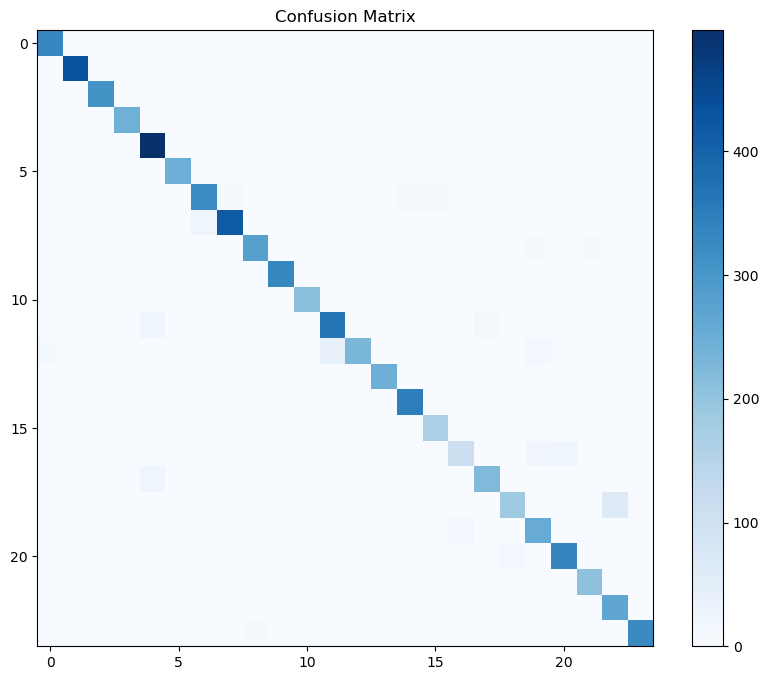

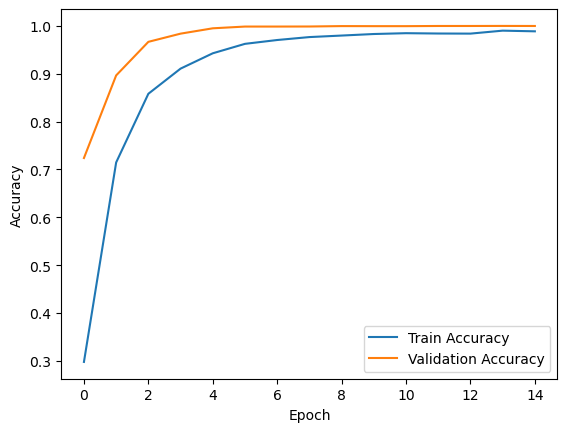

Model saved to hand_gesture_recognition_model.h5


In [8]:
(X_train, y_train), (X_test, y_test) = load_data('sign_mnist_train.csv', 'sign_mnist_test.csv')
X_train, y_train = preprocess_data(X_train, y_train)
X_test, y_test = preprocess_data(X_test, y_test)

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Build the CNN model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(25, activation='softmax')  # 25 gesture classes
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and train the model
model = create_model()
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=64
)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

# Classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

# Visualize training results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Save the model
model.save("hand_gesture_recognition_model.h5")
print("Model saved to hand_gesture_recognition_model.h5")